# Blog Comments Count Prediction
#### 2024.6.24

### Purpose of Data Analysis
Analyze posts with positive consumer feedback.
Predict posts that will receive good consumer reactions in advance to enhance the competitiveness of the portal site.

### Key Points
Analysis and statistical testing of continuous and categorical data.
Approaches to EDA (Exploratory Data Analysis) when dealing with a large number of data columns.
Methods to handle target label distribution when training regression models (considering outlier labels).

In [2]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

from IPython.display import Image

# library for statistic and EDA
from scipy import stats
from scipy.stats import kruskal

# library for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. Data Processing 1

### 1-1 Data Load

In [3]:
random_state = 1234
df_train_comment = pd.read_csv('./data/2.Blog_comment/df_train_comment.csv')
df_train_comment.head()

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,avg(24h_comment_after_blogpost_blog),std(24h_comment_after_blogpost_blog),min(24h_comment_after_blogpost_blog),max(24h_comment_after_blogpost_blog),median(24h_comment_after_blogpost_blog),avg(difference_24h_comment_between_basetime_blogpost_blog),std(difference_24h_comment_between_basetime_blogpost_blog),min(difference_24h_comment_between_basetime_blogpost_blog),max(difference_24h_comment_between_basetime_blogpost_blog),median(difference_24h_comment_between_basetime_blogpost_blog)
0,7638683741439,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
1,155122932624,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
2,3017770344577,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
3,8531508743621,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
4,359127110474,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0


In [4]:
# Load Train Data Set
df_train_link = pd.read_csv("./data/2.Blog_comment/df_train_link.csv")
df_train_blog_content = pd.read_csv("./data/2.Blog_comment/df_train_blog_content.csv")
df_train_blog_date = pd.read_csv("./data/2.Blog_comment/df_train_blog_date.csv")
df_train_blog_parent = pd.read_csv("./data/2.Blog_comment/df_train_blog_parent.csv")
df_train_blog_target = pd.read_csv("./data/2.Blog_comment/df_train_blog_target.csv")

In [5]:
df_train_blog_target.head(5)

,blog_id,target
0,7638683741439,1.0
1,155122932624,0.0
2,3017770344577,0.0
3,8531508743621,1.0
4,359127110474,27.0


In [6]:
# Load Test Data Set
df_test_comment = pd.read_csv("./data/2.Blog_comment/df_test_comment.csv")
df_test_link = pd.read_csv("./data/2.Blog_comment/df_test_link.csv")
df_test_blog_content = pd.read_csv("./data/2.Blog_comment/df_test_blog_content.csv")
df_test_blog_date = pd.read_csv("./data/2.Blog_comment/df_test_blog_date.csv")
df_test_blog_parent = pd.read_csv("./data/2.Blog_comment/df_test_blog_parent.csv")
df_test_blog_target = pd.read_csv("./data/2.Blog_comment/df_test_blog_target.csv")

In [7]:
df_train_blog_parent.head()

,blog_id,parent_blog,min(comment_on_parent_blog),max(comment_on_parent_blog),avg(comment_on_parent_blog)
0,7638683741439,0.0,NaN,0.0,0.0
1,155122932624,0.0,0.0,0.0,0.0
2,3017770344577,0.0,0.0,0.0,0.0
3,8531508743621,0.0,0.0,0.0,0.0
4,359127110474,0.0,NaN,0.0,0.0


In [8]:
df_train_blog_parent.parent_blog.unique()

array([  0.,   1.,   2.,   3.,   5.,   7.,   4.,   6.,   9., 136., 101.,
        35.,  32.,  13.,  12.,   8.,  21.,  20.,  11.,  10.,  15.,  14.])

In [9]:
df_test_blog_parent.head()

,blog_id,parent_blog,min(comment_on_parent_blog),max(comment_on_parent_blog),avg(comment_on_parent_blog)
0,5610306109,0.0,0.0,0.0,0.0
1,1984909392749,0.0,0.0,0.0,0.0
2,117839817913,0.0,0.0,0.0,0.0
3,1453294624507,0.0,0.0,0.0,0.0
4,1357160498521,0.0,0.0,0.0,0.0


In [10]:
df_train_link.describe()

,blog_id,total_link_before_basetime_page,24h_link_before_basetime_page,24h_link_after_blogpost_page,avg(total_link_before_basetime_blog),std(total_link_before_basetime_blog),min(total_link_before_basetime_blog),max(total_link_before_basetime_blog),median(total_link_before_basetime_blog),avg(24h_link_before_basetime_blog),...,avg(24h_link_after_blogpost_blog),std(24h_link_after_blogpost_blog),min(24h_link_after_blogpost_blog),max(24h_link_after_blogpost_blog),median(24h_link_after_blogpost_blog),avg(difference_24h_link_between_basetime_blogpost_blog),std(difference_24h_link_between_basetime_blogpost_blog),min(difference_24h_link_between_basetime_blogpost_blog),max(difference_24h_link_between_basetime_blogpost_blog),median(difference_24h_link_between_basetime_blogpost_blog)
count,5.239700e+04,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52273.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,3.670163e+12,0.501345,0.191614,0.457183,0.501345,0.778465,0.002195,5.537531,0.279176,0.191614,...,0.457183,0.725900,0.002195,5.033895,0.171250,0.011718,0.685857,-3.926923,4.281505,0.000286
std,3.186612e+12,1.562923,0.877402,1.472210,0.960882,0.955727,0.075003,6.989038,0.861055,0.359482,...,0.899341,0.911791,0.075003,6.503113,0.685764,0.022452,0.942957,4.533971,5.180441,0.018533
min,4.094774e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.055556,0.000000,-20.000000,0.000000,-0.500000
25%,6.685753e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000
50%,2.943311e+12,0.000000,0.000000,0.000000,0.108696,0.394463,0.000000,2.000000,0.000000,0.043165,...,0.092637,0.371303,0.000000,2.000000,0.000000,0.000000,0.327737,-2.000000,2.000000,0.000000
75%,6.451619e+12,0.000000,0.000000,0.000000,0.498462,1.121571,0.000000,10.000000,0.000000,0.203822,...,0.435897,1.032096,0.000000,9.000000,0.000000,0.014286,0.942809,0.000000,8.000000,0.000000
max,9.999428e+12,30.000000,24.000000,26.000000,8.952662,5.194229,8.000000,30.000000,11.000000,3.153846,...,8.491124,4.957952,8.000000,26.000000,11.000000,0.666667,7.778174,0.000000,23.000000,1.000000


In [12]:
df_train_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   blog_id                                                     52397 non-null  int64  
 1   total_link_before_basetime_page                             52397 non-null  float64
 2   24h_link_before_basetime_page                               52397 non-null  float64
 3   24h_link_after_blogpost_page                                52397 non-null  float64
 4   avg(total_link_before_basetime_blog)                        52397 non-null  float64
 5   std(total_link_before_basetime_blog)                        52397 non-null  float64
 6   min(total_link_before_basetime_blog)                        52397 non-null  float64
 7   max(total_link_before_basetime_blog)                        52397 non-null  float64
 

In [13]:
df_train_blog_content.head(3)

,blog_id,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,...,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199
0,7638683741439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,155122932624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3017770344577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_train_blog_content.describe()

,blog_id,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,...,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199
count,5.239700e+04,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,3.670163e+12,0.001641,0.175697,0.000076,0.000305,0.353780,0.157795,0.241407,0.002424,0.003416,...,0.000191,0.025956,0.014676,0.000248,0.042044,0.002290,0.003435,0.002615,0.008455,0.000305
std,3.186612e+12,0.040480,0.380566,0.008737,0.017472,0.478146,0.364552,0.427941,0.049173,0.058349,...,0.013814,0.159005,0.120255,0.015750,0.200692,0.047802,0.058511,0.051067,0.091561,0.017472
min,4.094774e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.685753e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.943311e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.451619e+12,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999428e+12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_train_blog_date.head(3)

,blog_id,difference_date_between_basetime_blogpost,mon_basetime,tue_basetime,wed_basetime,thur_basetime,fri_basetime,sat_basetime,sun_basetime,mon_blogpost,tue_blogpost,wed_blogpost,thur_blogpost,fri_blogpost,sat_blogpost,sun_blogpost
0,7638683741439,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,155122932624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3017770344577,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
df_train_blog_date.describe()

,blog_id,difference_date_between_basetime_blogpost,mon_basetime,tue_basetime,wed_basetime,thur_basetime,fri_basetime,sat_basetime,sun_basetime,mon_blogpost,tue_blogpost,wed_blogpost,thur_blogpost,fri_blogpost,sat_blogpost,sun_blogpost
count,5.239700e+04,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,3.670163e+12,2850.294864,0.113919,0.115808,0.138100,0.165296,0.167758,0.161650,0.137470,0.159227,0.167681,0.171327,0.162242,0.154455,0.096151,0.088917
std,3.186612e+12,3814.180711,0.317716,0.319998,0.345008,0.371451,0.373655,0.368133,0.344346,0.365891,0.373587,0.376798,0.368676,0.361388,0.294800,0.284627
min,4.094774e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.685753e+11,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.943311e+12,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.451619e+12,3959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999428e+12,57894.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



#### Data Joining Process
- The common key blog_id is used for joining, as it is unique across the datasets.
Perform joins on both train and test datasets individually.
- There are five types of joins:
1. Inner Join: Intersection, uses only the overlapping values from the original and join tables.
2. Left Join: Based on the left table, includes all values from the left table and matched values from the right table (non-matching values will have NA).
3. Right Join: Based on the right table, includes all values from the right table and matched values from the left table (non-matching values will have NA).
4. Full Outer Join: Union, includes all values from both tables.
5. Cross Join: Cartesian product, includes all possible combinations of rows from both tables.

In [17]:
df_train_list = [df_train_link, df_train_blog_parent, df_train_blog_date, df_train_blog_content, df_train_blog_target]

In [18]:
df_train = df_train_comment.copy()
for df_candidate in df_train_list:
    df_train = pd.merge(df_train, df_candidate, on='blog_id')
df_train.head(5)

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,7638683741439,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,155122932624,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3017770344577,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8531508743621,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,359127110474,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [19]:
df_train.head(5)

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,7638683741439,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,155122932624,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3017770344577,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8531508743621,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,359127110474,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [20]:
df_test = df_test_comment.copy()
df_test_list = [df_test_link, df_test_blog_parent, df_test_blog_date, df_test_blog_content, df_test_blog_target]
for df_candidate in df_test_list:
    df_test = pd.merge(df_test, df_candidate, on="blog_id")
df_test.head(5)

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,5610306109,35.0,35.0,0.0,35.0,35.0,10.630660,17.882992,1.0,259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,1984909392749,21.0,0.0,2.0,21.0,-2.0,43.435825,75.590485,0.0,634.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,117839817913,2.0,2.0,0.0,2.0,2.0,1.733333,3.043390,0.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1453294624507,3.0,3.0,0.0,3.0,3.0,27.230215,45.970950,0.0,371.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1357160498521,0.0,0.0,0.0,0.0,0.0,4.500000,6.677075,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1-2 Check Data Duplication

In [21]:
print("Number of duplicate entries in Train Data:", df_train.drop("blog_id", axis=1).duplicated().sum())

Number of duplicate entries in Train Data: 3309


In [22]:
df_train = df_train.drop(["blog_id"], axis=1).drop_duplicates(keep='first')

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49088 entries, 0 to 52396
Columns: 278 entries, total_comment_before_basetime_page to target
dtypes: float64(278)
memory usage: 104.5 MB


In [25]:
# don't forget to reset index
df_train.head()

,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),median(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
5,6.0,0.0,2.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_train = df_train.reset_index(drop=True).copy()

In [27]:
df_train.head()

,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),median(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
4,6.0,0.0,2.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print("Number of duplicate entries in Test Data:", df_test.drop("blog_id", axis=1).duplicated().sum())
df_test = df_test.drop(["blog_id"], axis=1).drop_duplicates(keep='first')
df_test = df_test.reset_index().drop(["index"], axis=1).copy()
df_test.info()

Number of duplicate entries in Test Data: 790
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Columns: 278 entries, total_comment_before_basetime_page to target
dtypes: float64(278)
memory usage: 14.5 MB


## 2. EDA

### 2-1 Data Type and Summary

In [29]:
df_train.info()
#categorical과 numeric feature type을 heuristic하게 검증 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49088 entries, 0 to 49087
Columns: 278 entries, total_comment_before_basetime_page to target
dtypes: float64(278)
memory usage: 104.1 MB


In [30]:
for column_name in list(df_train.columns):
    print(column_name, df_train[column_name].unique())
# there are some categorical data printed as 0,1 (these are not numerical data)
# also we can find some column that is not needed

total_comment_before_basetime_page [2.000e+00 6.000e+00 3.000e+00 3.000e+01 0.000e+00 5.100e+01 1.000e+01
 3.200e+01 6.400e+01 2.500e+01 3.500e+01 6.500e+01 4.600e+01 4.000e+00
 9.000e+00 3.770e+02 1.000e+00 3.980e+02 4.010e+02 7.000e+00 2.100e+01
 3.300e+01 2.600e+01 3.600e+01 5.200e+01 5.400e+01 1.400e+01 1.800e+01
 1.900e+01 3.700e+01 7.100e+01 7.200e+01 5.000e+00 6.200e+01 1.700e+01
 7.900e+01 5.900e+01 3.100e+01 1.300e+01 1.100e+01 1.600e+01 4.000e+01
 5.300e+01 5.600e+01 1.160e+02 5.700e+01 1.870e+02 5.500e+01 8.100e+01
 8.900e+01 3.900e+01 1.500e+01 4.300e+01 2.200e+01 1.200e+02 1.320e+02
 9.900e+01 1.050e+02 1.090e+02 4.200e+01 4.800e+01 5.000e+01 1.330e+02
 7.500e+01 9.500e+01 1.000e+02 2.900e+01 4.100e+01 1.600e+02 1.610e+02
 1.240e+02 1.220e+02 1.230e+02 1.150e+02 1.200e+01 1.350e+02 1.420e+02
 1.460e+02 8.000e+01 8.000e+00 9.200e+01 9.800e+01 7.300e+01 6.600e+01
 7.700e+01 7.800e+01 1.940e+02 2.030e+02 2.120e+02 1.130e+02 2.700e+01
 2.300e+01 2.400e+01 8.700e+01 3.800e+01 7

In [32]:
# Distinguishing Categorical and Numerical Columns
#Columns with only two unique values (0, 1) are identified as categorical columns.
count = 0
categorical_column_list = []
numeric_column_list = []
for column_name in list(df_train.columns):
    unique_list = df_train[column_name].unique()
    if len(unique_list) == 2: #Columns with only two unique values
        if (1 in unique_list) & (0 in unique_list):
            count = count + 1
            categorical_column_list.append(column_name)
        else:
            numeric_column_list.append(column_name)
    else:
        numeric_column_list.append(column_name)
print("categorical columns : " + str(count))
print(categorical_column_list)

categorical columns : 214
['mon_basetime', 'tue_basetime', 'wed_basetime', 'thur_basetime', 'fri_basetime', 'sat_basetime', 'sun_basetime', 'mon_blogpost', 'tue_blogpost', 'wed_blogpost', 'thur_blogpost', 'fri_blogpost', 'sat_blogpost', 'sun_blogpost', 'word_0', 'word_1', 'word_2', 'word_3', 'word_4', 'word_5', 'word_6', 'word_7', 'word_8', 'word_9', 'word_10', 'word_11', 'word_12', 'word_13', 'word_14', 'word_15', 'word_16', 'word_17', 'word_18', 'word_19', 'word_20', 'word_21', 'word_22', 'word_23', 'word_24', 'word_25', 'word_26', 'word_27', 'word_28', 'word_29', 'word_30', 'word_31', 'word_32', 'word_33', 'word_34', 'word_35', 'word_36', 'word_37', 'word_38', 'word_39', 'word_40', 'word_41', 'word_42', 'word_43', 'word_44', 'word_45', 'word_46', 'word_47', 'word_48', 'word_49', 'word_50', 'word_51', 'word_52', 'word_53', 'word_54', 'word_55', 'word_56', 'word_57', 'word_58', 'word_59', 'word_60', 'word_61', 'word_62', 'word_63', 'word_64', 'word_65', 'word_66', 'word_67', 'word_68'

In [33]:
print("numeric columns : " + str(len(numeric_column_list)))
print(numeric_column_list)

numeric columns : 64
['total_comment_before_basetime_page', '24h_comment_before_basetime_page', 'difference_total_24h_comment_page', '24h_comment_after_blogpost_page', 'difference_24h_comment_between_basetime_blogpost_page', 'avg(total_comment_before_basetime_blog)', 'std(total_comment_before_basetime_blog)', 'min(total_comment_before_basetime_blog)', 'max(total_comment_before_basetime_blog)', 'median(total_comment_before_basetime_blog)', 'avg(24h_comment_before_basetime_blog)', 'std(24h_comment_before_basetime_blog)', 'min(24h_comment_before_basetime_blog)', 'max(24h_comment_before_basetime_blog)', 'median(24h_comment_before_basetime_blog)', 'avg(difference_total_24h_comment_blog)', 'std(difference_total_24h_comment_blog)', 'min(difference_total_24h_comment_blog)', 'max(difference_total_24h_comment_blog)', 'median(difference_total_24h_comment_blog)', 'avg(24h_comment_after_blogpost_blog)', 'std(24h_comment_after_blogpost_blog)', 'min(24h_comment_after_blogpost_blog)', 'max(24h_comment

In [35]:
# isnull()
# isna()
df_train.isna().sum().sort_values(ascending=False)

min(comment_on_parent_blog)           22552
std(24h_link_after_blogpost_blog)       124
total_comment_before_basetime_page        0
word_115                                  0
word_113                                  0
                                      ...  
word_22                                   0
word_23                                   0
word_24                                   0
word_25                                   0
target                                    0
Length: 278, dtype: int64

In [36]:
print(df_train.columns[(df_train.isnull().sum() > 0)])

Index(['std(24h_link_after_blogpost_blog)', 'min(comment_on_parent_blog)'], dtype='object')


##### Summary of Data Set
##### Number of Variables : 291
    numeric variables : 64 (target incl.)
    categorical variables : 214
##### Number of observations(Train) : 49088 (dropped duplicated)
##### Missing Cells : 2 columns
    column 1 : std(24h_link_after_blogpost_blog) 124
    column 2 : min(comment_on_parent_blog)       22552
##### Duplicated Rows : 3309/790 

### 2-2 Dependent Data Explore

In [37]:
df_train["target"].describe()

count    49088.000000
mean         6.969667
std         38.756549
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       1424.000000
Name: target, dtype: float64

In [38]:
df_train["target"].median()

0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae7114a650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae7114ab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae7114a3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae7114b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae7114b370>],
 'means': []}

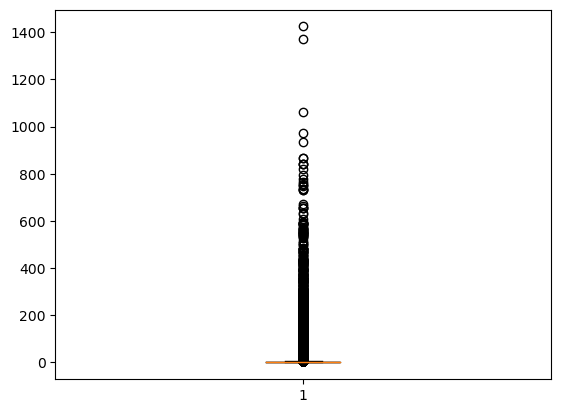

In [39]:
plt.boxplot(df_train["target"])

<Axes: >

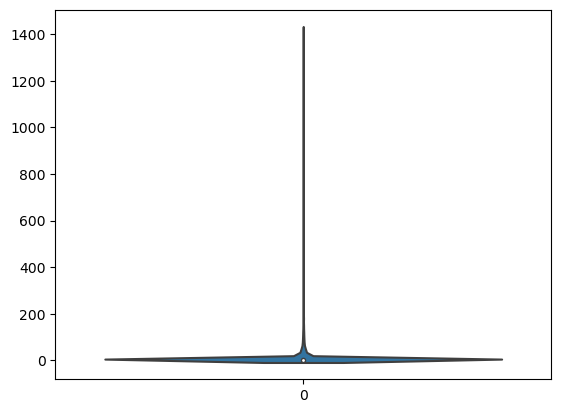

In [42]:
sns.violinplot(df_train["target"])

*   왜도 (skewness)
*   Positive Skew : 오른쪽으로 길게 뻗음
*   Negative Skew : 왼쪽으로 길게 뻗음
*   첨도 (kurtosis)
*   kurtosis == 0 : 정규분포와 유사한 뾰족한 정도
*   kurtosis < 0 : 정규분포보다 낮은 뾰족함
*   kurtosis > 0 : 정규분포보다 뾰족함

In [43]:
print("skew : "+ str(df_train["target"].skew()))
print("kurtosis : "+ str(df_train["target"].kurtosis()))

skew : 12.430651176535642
kurtosis : 221.64692432309462


/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Percent'>

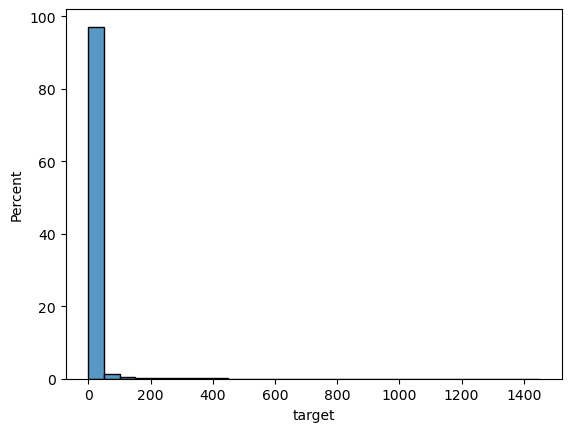

In [48]:
sns.histplot(data=df_train, x="target", binwidth=50, stat="percent")

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Percent'>

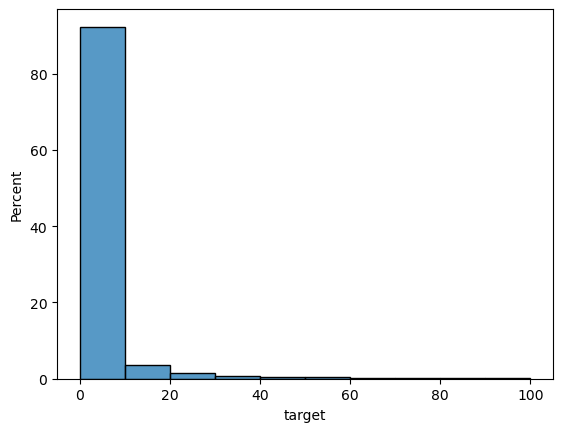

In [49]:
sns.histplot(data=df_train[df_train["target"]<100], x="target", binwidth=10, stat="percent")

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Percent'>

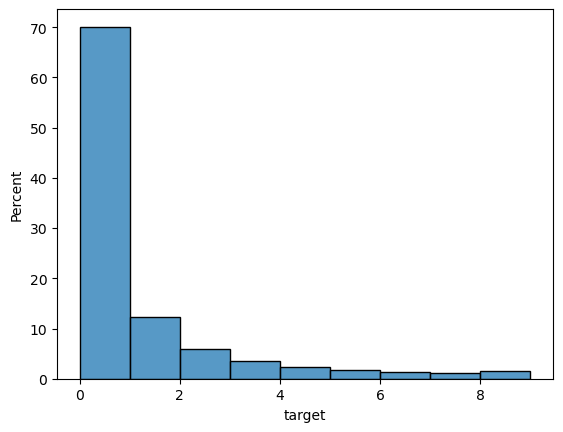

In [50]:
sns.histplot(data=df_train[df_train["target"]<10], x="target", binwidth=1, stat="percent")

In [51]:
count = len(df_train[df_train["target"]<=10])/len(df_train)
print("comments less than or equal to 10 : " + str(round((count)*100,1)) + "%")

# 91.5% 데이터가 10이하인 값으로 target_column에 분포. 이는 모델 학습시 고려되어야 할 수 있음

comments less than or equal to 10 : 91.5%


In [52]:
df_train[df_train["target"]<=10].describe()["target"]

count    44896.000000
mean         0.884221
std          1.878988
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: target, dtype: float64

<Axes: xlabel='target'>

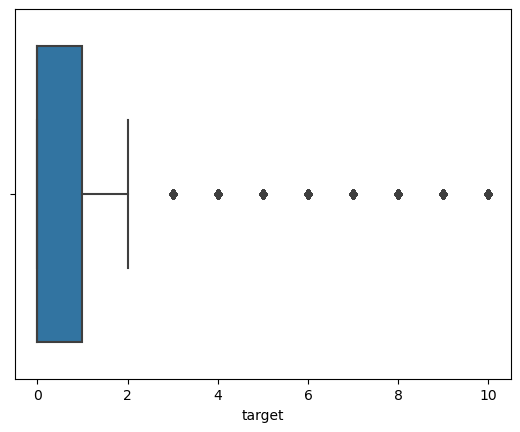

In [53]:
sns.boxplot(data=df_train[df_train["target"]<=10], x="target")

#### Insight
* The target variable has very high skewness and kurtosis.
* Values below 10 constitute 91.5% of the total.
* The skewed target column may need special consideration during model training (over-generalization might lead to poor performance).

### 2-3 Independent Data Explore

### Checking the Distribution of Feature Data
There are too many feature columns. How can we analyze them?

1. Take a high-level view of the data:
- Since detailed exploration is difficult, look at the data from a broader perspective (e.g., using a correlation analysis heatmap or the describe() function).

2. Explore each data point individually:
- Examine the distribution and characteristics of each feature one by one.

3. Perform the first step, then explore a subset of the data:
- After the high-level analysis, select and explore a subset of the data in detail.